
## Pathlib 介紹

在 Python 中，pathlib 模組提供了一個物件導向的方式來處理檔案系統路徑。它允許代碼以一種更直觀和跨平台的方式來操作路徑，不論是在 Mac、Linux 還是 Windows 上。這意味著，使用 pathlib，你不需要擔心路徑分隔符的問題，因為 pathlib 會自動為你處理這些細節。

- 如果你用 Mac 或 Linux 作業系統，你的檔案路徑會使用前斜線（/）
- 如果位在 Windows 作業系統，則是反斜線（\）。

In [3]:
# 範例：查詢檔案所在資料夾的路徑
## Windows 是後斜線

path_win = r'C:\Users\haohao\test.txt'
print(path_win.rsplit('\\', maxsplit=1))


## Mac 或 Linux 是前斜線

path_mac = '/Users/haohao/test.txt'
print(path_mac.rsplit('/', maxsplit=1))



['C:\\Users\\haohao', 'test.txt']
['/Users/haohao', 'test.txt']




## pathlib 的 Path 類別介紹 - 物件導向的檔案路徑操作


### 創建和使用 Path 對象
首先，從 `pathlib` 導入 `Path` 類別，然後創建一個指向特定位置（例如桌面）的 Path 對象。這個對象可以用來進行各種路徑相關的操作：

In [5]:
# 在 pathlib 將檔案路徑透過 Path 類別包裝之後，就可以使用各種方便的檔案路徑操作。

from pathlib import Path

# 指向桌面的路徑
desktop_path = Path('./Desktop')
print(desktop_path)



Desktop


### 獲取絕對路徑
使用 resolve 方法可以找出一個路徑的絕對路徑。這對於確認路徑的確切位置很有用：

In [6]:
# 獲取絕對路徑
absolute_path = desktop_path.resolve()
print(absolute_path)


D:\python_workspace\project_python_skill\advance_python\Desktop


### 指向當前工作目錄
如果創建 Path 對象時沒有傳入任何參數，它會預設指向當前 Python 腳本或終端機所在的目錄：

In [7]:
# 當前工作目錄的 Path 對象
current_path = Path()
print(current_path)

# 獲取當前工作目錄的絕對路徑
current_absolute_path = current_path.resolve()
print(current_absolute_path)


.
D:\python_workspace\project_python_skill\advance_python


## 跨作業系統
不論哪個作業系統，在 Path 物件內部，一律用前斜線（/）儲存路徑資料

`pathlib` 的 `Path` 類別在處理檔案路徑時非常智能，特別是在跨作業系統的情境下。它內部統一使用前斜線（/）來儲存和操作路徑，這種設計使得在編寫跨平台兼容的程式碼時變得輕鬆許多。然而，當需要將 Path 對象轉換成字串以供顯示或進一步處理時，Path 會自動根據執行程式的作業系統，選擇適當的路徑分隔符來表示路徑。

白話文: 希望讓不同檔案路徑的輸出都可以統一，書同文車同軌啦~

In [11]:
from pathlib import Path

# 在 Windows 中
p_windows = Path('C:/Users/Sunny')
print(f"Windows, 使用前斜線: {p_windows}")

# 在 Windows 中使用後斜線建立 Path 對象
# 注意使用雙反斜線避免轉義字元問題
p_windows_backslash = Path('C:\\Users\\Sunny')
print(f"Windows, 使用後斜線並跳脫: {p_windows_backslash}")

# 使用原始字串來避免轉義問題
p_windows_raw = Path(r'C:\Users\Sunny')
print(f"Windows, 使用原始字串: {p_windows_raw}")

# 在 Unix-like 系統中 (如 MacOS 或 Linux)
p_unix = Path('C:/Users/Sunny')
print(f"Unix-like, 使用前斜線: {p_unix}")

# 獲取並顯示絕對路徑
print(f"Windows 絕對路徑: {p_windows.resolve()}")
print(f"Unix-like 絕對路徑: {p_unix.resolve()}")

# 使用 print() 和 str() 展示路徑
print("使用 print() 展示 Windows Path:", end=" ")
print(p_windows.resolve())
print("使用 str() 展示 Windows Path:", str(p_windows.resolve()))


Windows, 使用前斜線: C:\Users\Sunny
Windows, 使用後斜線並跳脫: C:\Users\Sunny
Windows, 使用原始字串: C:\Users\Sunny
Unix-like, 使用前斜線: C:\Users\Sunny
Windows 絕對路徑: C:\Users\Sunny
Unix-like 絕對路徑: C:\Users\Sunny
使用 print() 展示 Windows Path: C:\Users\Sunny
使用 str() 展示 Windows Path: C:\Users\Sunny


## 透過前斜線（/）來連接子路徑的特殊語法


pathlib 提供的 Path 對象透過前斜線（/）的特殊語法來連接子路徑非常獨特且強大。這使得構建路徑變得直觀且易於閱讀，類似於在 Unix-like 系統的路徑操作。這種方式不僅可以應用於資料夾，也適用於檔案，並且不依賴於檔案或資料夾是否實際存在於檔案系統中。

ps: 不管檔案或資料夾是否存在，Path 都可以指向它。

### 使用 / 連接子路徑

In [24]:
from pathlib import Path

# 創建指向桌面的 Path 對象
p = Path('./Desktop')

# 使用 `/` 連接子路徑指向檔案
file_path = p / 'test.txt'
print(file_path)

# 使用 `/` 進一步延伸至子目錄中的檔案
nested_file_path = p / 'test_dir' / 'test.txt'
print(nested_file_path)

# 獲取絕對路徑
absolute_nested_file_path = nested_file_path.resolve()
print(absolute_nested_file_path)




Desktop\test.txt
Desktop\test_dir\test.txt
D:\python_workspace\project_python_skill\advance_python\Desktop\test_dir\test.txt


### 檔案路徑字串操作

In [38]:
nested_file_path = p / 'test_dir' / 'test.txt'

## relative to current working directory
print(nested_file_path)

## parent
print(nested_file_path.parent)

## stem
print(nested_file_path.stem)

## suffix
print(nested_file_path.suffix)

## name
print(nested_file_path.name)

test_dir\test.txt
test_dir
test
.txt
test.txt


### 檢查檔案或資料夾是否存在

In [17]:
# 檢查桌面上的檔案是否存在

p = Path()
print((p / 'foo.txt').exists())  # 檔案不存在時返回 False
print((p / '01_pathlib檔案路路徑IO.ipynb').exists())  # 如果檔案存在則返回 True


False
True


## 類別方法的使用

在 pathlib 的 Path 類別中，有些方法是類別方法（class methods），這意味著它們可以直接通過類別本身呼叫，而不需要創造一個類別的實例。這些方法非常適合於進行那些不依賴於特定路徑實例的操作，例如獲取當前工作目錄或者使用者的家目錄路徑。

### 獲取當前工作目錄（Current Working Directory）
這個方法返回一個表示當前工作目錄的 Path 對象。這是在很多應用場景中都非常有用的信息，比如當你需要根據當前腳本的位置來訪問相對路徑時。

In [18]:
from pathlib import Path

current_working_directory = Path.cwd()
print(f"當前工作目錄：{current_working_directory}")


當前工作目錄：d:\python_workspace\project_python_skill\advance_python


### 獲取使用者的家目錄路徑
家目錄路徑是操作系統為每個用戶設定的一個特定的文件目錄，通常用來儲存個人文件和設定。使用 Path.home() 可以獲取當前用戶的家目錄路徑。

In [19]:
user_home_directory = Path.home()
print(f"使用者家目錄路徑：{user_home_directory}")


使用者家目錄路徑：C:\Users\user


## 簡易檔案讀寫

pathlib 中的 Path 對象不僅提供了強大的路徑操作功能，還允許直接對文件進行讀寫等操作，這些操作包括創建、刪除文件等。這樣的設計讓文件操作變得非常直觀和方便，尤其是對於熟悉 Linux Shell 指令的用戶來說，Path 的方法名稱和功能會感到非常熟悉。

### 創建、寫入、讀取和刪除文件

In [42]:
from pathlib import Path

# 指向桌面上的檔案路徑
p = Path('test.txt')

# 確認檔案是否存在
if not p.exists():
    # 創建檔案
    p.touch()
    print("檔案創建成功。")

# 寫入文字到檔案
p.write_text('hello world!')
print("寫入完成。")

# 讀取檔案內容
content = p.read_text()
print(f"檔案內容：{content}")

# 刪除檔案
p.unlink()
print("檔案已刪除。")

# 再次確認檔案是否存在
if not p.exists():
    print("確認檔案已經被刪除。")


寫入完成。
檔案內容：hello world!
檔案已刪除。
確認檔案已經被刪除。


## fastai 的 Path 使用

fastai 是一個旨在讓深度學習更加直觀和可訪問的高級 API，建立在 PyTorch 之上。它提供了許多功能強大的工具和簡化的流程，使得從數據準備到模型訓練、評估直至部署都變得更加簡單。在檔案操作方面，fastai 通過 Path 類別來實現高效的路徑處理，並透過一些擴展方法來提升操作的便利性。

### 擴展的 ls 方法
fastai 通過所謂的 Monkey Patching 方法，對 Path 類別進行擴展，添加了 ls 方法。這個方法使得列出目錄內容變得更加簡單，類似於 Unix 系統中的 ls 指令。

In [43]:
from pathlib import Path

# 透過 Monkey Patching 為 Path 類別添加 ls 方法
Path.ls = lambda x: [o.name for o in x.iterdir()]

# 使用 Path 物件
p = Path('.')
# 列出當前目錄下的所有檔案和資料夾
print(p.ls())

# 進一步，只列出目錄或檔案
print([o.name for o in p.iterdir() if o.is_dir()])  # 只列出資料夾
print([o.name for o in p.iterdir() if o.is_file()])  # 只列出檔案


['01_pathlib檔案路路徑IO.ipynb', 'OOP']
['OOP']
['01_pathlib檔案路路徑IO.ipynb']


### untar_data
fastai 內 untar_data() 的主要功能是下載並讀取資料，它會將資料存放成 Path 物件、而不是直接讀取檔案。以機器學習會用到的圖片資料集為例，常見存放方式是同個資料夾存放同一個標記（Label）的圖片、或者檔案名稱就是圖片內容標記等等。因此，untar_data() 如此設計，就可以用 Path 方便的路徑字串處理，快速取出標記

In [46]:
from fastai.vision.all import untar_data, URLs, get_image_files

# 下載並解壓數據集，返回數據集根目錄的 Path 對象
path = untar_data(URLs.PETS)

# 使用 ls 方法列出根目錄下的內容
print(path.ls())

# 指定圖片目錄的 Path 對象
path_img = path/'images'

# 獲取所有圖片文件的 Path 對象
fnames = get_image_files(path_img)

# 列出前幾個圖片文件
print(fnames[:5])

# 從檔名中提取標記
print(fnames[0].stem)


[Path('C:/Users/user/.fastai/data/oxford-iiit-pet/annotations'), Path('C:/Users/user/.fastai/data/oxford-iiit-pet/images')]
[Path('C:/Users/user/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'), Path('C:/Users/user/.fastai/data/oxford-iiit-pet/images/Abyssinian_10.jpg'), Path('C:/Users/user/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg'), Path('C:/Users/user/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.jpg'), Path('C:/Users/user/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg')]
Abyssinian_1


## 實務應用 - 圖片讀取

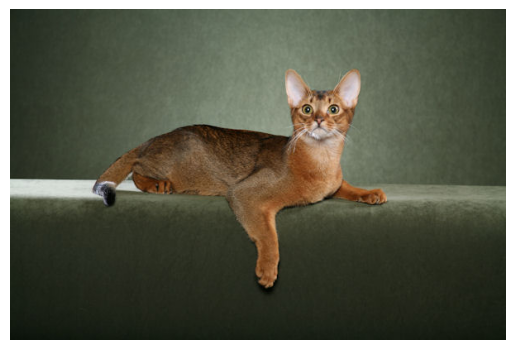

In [59]:
from PIL import Image
import matplotlib.pyplot as plt

# 图像文件路径
image_path = get_image_files(path_img)[0]

# 使用 Pillow 库打开图像
image = Image.open(image_path)

# 使用 matplotlib 显示图像
plt.imshow(image)
plt.axis('off')  # 不显示坐标轴
plt.show()
